In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

import warnings
warnings.filterwarnings('ignore')

### Load the dataset

- Load the train data and using all your knowledge of pandas try to explore the different statistical properties like correlation of the dataset.

Shape of train dataset is (4781, 17)
Statistical Properties of the train data are as follows:
                Id        Rooms         Type         Price       Method  \
count  4781.000000  4781.000000  4781.000000  4.781000e+03  4781.000000   
mean   3432.481908     2.964861     0.540473  1.080936e+06     1.441330   
std    1953.488159     0.957911     0.837337  6.757098e+05     1.141898   
min       0.000000     1.000000     0.000000  1.450000e+05     0.000000   
25%    1757.000000     2.000000     0.000000  6.300000e+05     1.000000   
50%    3434.000000     3.000000     0.000000  9.000000e+05     1.000000   
75%    5126.000000     4.000000     1.000000  1.337000e+06     1.000000   
max    6829.000000     8.000000     2.000000  9.000000e+06     4.000000   

           SellerG     Distance     Postcode     Bathroom          Car  \
count  4781.000000  4781.000000  4781.000000  4781.000000  4781.000000   
mean    131.485254    10.045367  3103.308931     1.587952     1.605522   
std     

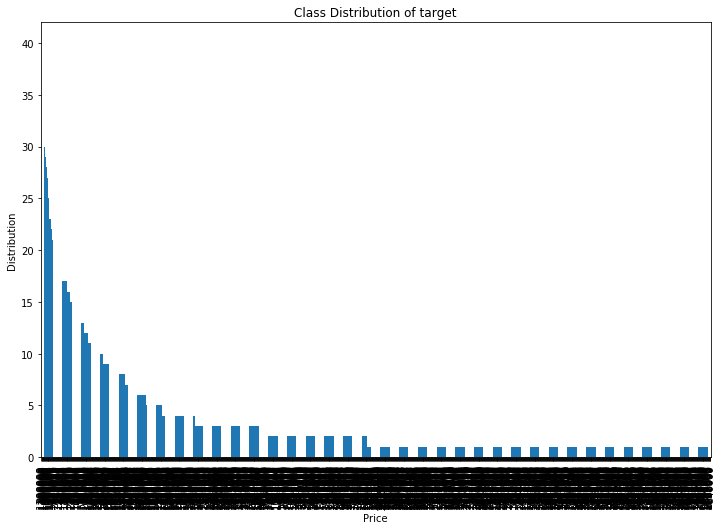

Skewness for the different features is as shown below:
Rooms             0.208722
Type              1.029247
Price             2.429553
Method            1.071776
SellerG           0.129703
Distance          1.674962
Postcode          3.921342
Bathroom          1.328302
Car               1.532654
Landsize         21.066059
BuildingArea      8.885376
YearBuilt        -2.135044
CouncilArea       0.033060
Longtitude       -0.270886
Regionname       -0.498197
Propertycount     1.039731
dtype: float64


In [2]:
# Code starts here

train = pd.read_csv('../file_4/train.csv')
#train.head()

print('Shape of train dataset is', train.shape)

print('Statistical Properties of the train data are as follows:')
print(train.describe())

train.drop('Id', axis=1, inplace=True)

fig = plt.figure(figsize=(12, 8))
train['Price'].value_counts().plot(kind='bar')
plt.title('Class Distribution of target')
plt.xlabel('Price')
plt.ylabel('Distribution')
plt.show()

print('Skewness for the different features is as shown below:')
print(train.skew())

# Code ends here.

In [15]:
#Check Correlation

corr = train.corr()
print(corr)

                  Rooms      Type     Price    Method   SellerG  Distance  \
Rooms          1.000000 -0.590817  0.523579 -0.053525 -0.029506  0.289699   
Type          -0.590817  1.000000 -0.426876  0.088308  0.026955 -0.242188   
Price          0.523579 -0.426876  1.000000 -0.048165 -0.065393 -0.158197   
Method        -0.053525  0.088308 -0.048165  1.000000 -0.008889 -0.064479   
SellerG       -0.029506  0.026955 -0.065393 -0.008889  1.000000  0.024476   
Distance       0.289699 -0.242188 -0.158197 -0.064479  0.024476  1.000000   
Postcode       0.050753  0.018737  0.120166 -0.034679 -0.001913  0.414110   
Bathroom       0.607276 -0.276890  0.493173 -0.013801 -0.034939  0.114934   
Car            0.420030 -0.278868  0.237160 -0.019285 -0.000271  0.257264   
Landsize       0.092030 -0.043433  0.072753 -0.021601 -0.028470  0.063563   
BuildingArea   0.595395 -0.386768  0.519207 -0.048287 -0.042596  0.145823   
YearBuilt     -0.056373  0.304479 -0.297060  0.021274 -0.000680  0.252163   

## Model building

- Separate the features and target and then split the train data into train and validation set.
- Apply different models of your choice and  then predict on the validation data and find the `accuracy_score` for this prediction.
- Try improving upon the `accuracy_score` using different regularization techniques.

In [5]:
# Code starts here

regressor = LinearRegression()

regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_val)

r2 = r2_score(y_val, y_pred)

print(r2)

# Code ends here.

0.6709784755252352


In [6]:
# Predict the price of the house using a lasso regressor. Check if there is any improvement in the prediction.

lasso = Lasso()

lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_val)

r2_lasso = r2_score(y_val, y_pred)

print(r2_lasso)

0.6709781414170171


In [7]:
# Let's check the house price prediction using a ridge regressor.

ridge = Ridge()

ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_val)

r2_ridge = r2_score(y_val, y_pred)

print(r2_ridge)

0.6707652090660219


In [8]:
# Next predict the house price using cross-validated estimators which are the part of the Model selection: choosing estimators and their parameters.

regressor = LinearRegression()

score = cross_val_score(regressor, X_train, y_train, scoring='r2', cv=10)
print(score)

mean_score = np.mean(score)

print(mean_score)

[0.57769766 0.69786557 0.68962943 0.21091495 0.54907255 0.63559724
 0.45884698 0.65518455 0.61303293 0.58507978]
0.5672921638321348


#### As you can see that there is very less improvement(~1%), even after applying the regularization and cross-validation score, perform the prediction using a polynomial regressor to generate second-degree polynomial features.

In [9]:
# make pipeline for second degree polynomialfeatures
model = make_pipeline(PolynomialFeatures(2), LinearRegression())

model.fit(X_train, y_train)
y_pred = model.predict(X_val)

r2_poly = r2_score(y_val, y_pred)
print(r2_poly)

0.7272584397288063


### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [10]:
# Code starts here

# Prediction on test data

test = pd.read_csv('../file_4/test.csv')

id_ = test['Id']

test.drop('Id', axis=1, inplace=True)

y_pred_test = model.predict(test)

# Create a sample submission file
sample_submission = pd.DataFrame({'Id':id_,'Price':y_pred_test})

# Convert the sample submission file into a csv file
sample_submission.to_csv('sample_submission1.csv',index=False)

# Code ends here.